<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Introduction

## Aim of this Notebook

The current notebook showcases my current ability in machine learning as well as serves as a playground for trying out new concepts. This means the notebook is updated frequently while being improved on in the background. I will aim to swiftly weave my thought processes in between the lines of code using the text blocks (such as this one) to give insight into my current knowledge and reasoning.

## Box-Plots for Education (DrivenData)

The data used in this project has been retrieved from the DrivenData's competition: box-plots-for-education (https://www.drivendata.org/competitions/46/box-plots-for-education-reboot). The aim of the competition is to help schools correctly identify spending labels (previously done manually) based mostly on a large set of text features. The project is a supervised multi-class multi-label classification problem where the resulting machine is able to predict the most probable spending label for any new instance.

# 1. Preparation

First we make sure to load all the data, import the most basic packages and take a quick peek at the resulting data frame.

In [1]:
# To be viable for Python 2 & 3
from __future__ import division, print_function, unicode_literals

# Common imports, standard procedure
import numpy as np

# To plot pretty figures in jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Making sure the randomly generated output is consistent
np.random.seed(42)

# Opening up a path to the data files and saving the data to a pandas data frame
import os
import pandas as pd
notebook_path = os.path.abspath("Education_Python.ipynb")
csv = os.path.join(os.path.dirname(notebook_path), "TrainingData.csv")
with open(csv) as file:
    df = pd.read_csv(file, index_col=0)

# Checking the results
print('---------------------------------------------------------')
print('\t\t Main Dataframe')
print('---------------------------------------------------------')
print(df.head(5))

---------------------------------------------------------
		 Main Dataframe
---------------------------------------------------------
                       Function          Use          Sharing Reporting  \
134338     Teacher Compensation  Instruction  School Reported    School   
206341                 NO_LABEL     NO_LABEL         NO_LABEL  NO_LABEL   
326408     Teacher Compensation  Instruction  School Reported    School   
364634  Substitute Compensation  Instruction  School Reported    School   
47683   Substitute Compensation  Instruction  School Reported    School   

       Student_Type Position_Type               Object_Type     Pre_K  \
134338     NO_LABEL       Teacher                  NO_LABEL  NO_LABEL   
206341     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL   
326408  Unspecified       Teacher  Base Salary/Compensation  Non PreK   
364634  Unspecified    Substitute                  Benefits  NO_LABEL   
47683   Unspecified       Teacher   Substitute Com

# 2. Taking a peek (EDA)

Now that we have our data, let's get our hands dirty. First, we would like to know what we are working with by not only looking at the shape of the data frame but also the data types and value counts.


In [2]:
# Examine the shape and size
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

(400277, 25)

The dataset is mostly filled with object data types. We will later change most data types to categorical values for computational efficiency. There are 2 columns containing floats: FTE and Total. When referring to DrivenData's website; 'FTE' is the percentage of full-time work an employee engages in and 'Total' contains the total costs of the noted expenditure. Let's take a look at the contents of the object columns and then inspect the numeric information FTE and Total provide.

In [3]:
# Print the summary statistics and value counts of the columns to look for any irregularities
print('---------------------------------------------------------')
print('\t\tDescribe')
print('---------------------------------------------------------')

print(df.describe())

print('---------------------------------------------------------')
print('\t\tValue Counts')
print('---------------------------------------------------------')

Columns = df.columns.tolist()
for c in Columns:
    print(df[c].value_counts())


---------------------------------------------------------
		Describe
---------------------------------------------------------
                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08
---------------------------------------------------------
		Value Counts
---------------------------------------------------------
Teacher Compensation                               86354
Substitute Compensation                            62215
NO_LABEL                                           59579
Aides Compensation                                 19858
Instructional Materials & Supplies                 19711
Facilities & Maintenance                           19617
Professional Development                           19102
Student Transportation      

The object data are mostly strings containing many descriptions. As noted by DrivenData these are the features, labels and classes we will be working with. Next, we will explore the FTE and Total by plotting their histograms.

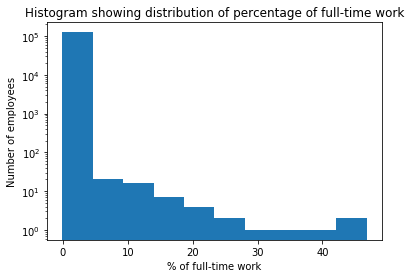

In [4]:
# Create the histogram of FTE
plt.hist(df['FTE'].dropna())
plt.title('Histogram showing distribution of percentage of full-time work')
plt.xlabel('% of full-time work')
plt.ylabel('Number of employees')
plt.yscale('log')
plt.show()

It seems like most employees are working less than 10% of full-time work. We don't know why, but we can easily check the most prevalent categories under 10%. My guess is that apart from regular employees the dataset also includes the expenditures on third party hiring: substitute teachers, coaches, electricians, plummers, technicians etc.

In [5]:
print('---------------------------------------------------------')
print('\t\tFTE lower than 10%')
print('---------------------------------------------------------')

FTE_10 = df[df['FTE']<0.10]
print(FTE_10['Position_Type'].value_counts())

print('---------------------------------------------------------')
print('\t\tFTE greater than 10%')
print('---------------------------------------------------------')

FTE_rest = df[df['FTE']>=0.10]
print(FTE_rest['Position_Type'].value_counts())

---------------------------------------------------------
		FTE lower than 10%
---------------------------------------------------------
Substitute                 35928
Teacher                     8097
Other                       5551
TA                          3331
Non-Position                3065
NO_LABEL                    2339
Custodian                    709
Club Advisor/Coach           484
Sec/Clerk/Other Admin        400
Coordinator/Manager          306
Instructional Coach          276
Guidance Counselor           169
School Monitor/Security      129
Librarian                    114
Vice Principal               105
Principal                     94
Nurse                         94
Social Worker                 51
Speech Therapist              48
Psychologist                  38
(Exec) Director               16
Physical Therapist            13
Occupational Therapist        10
Area Officers                  2
Nurse Aide                     1
Name: Position_Type, dtype: int64
----

The earlier guess was close; the <10% group mostly consists of substitute teachers. Surprisingly however, the second  most prevalent group is regular teachers. Now lets take a quick glance at Total. 

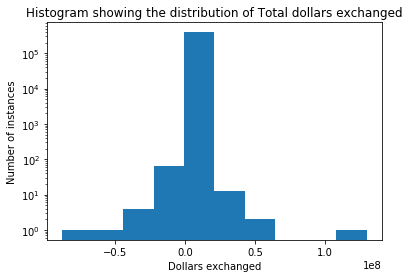

In [6]:
# create the histogram of Total
plt.hist(df['Total'].dropna())
plt.title('Histogram showing the distribution of Total dollars exchanged')
plt.xlabel('Dollars exchanged')
plt.ylabel('Number of instances')
plt.xscale('linear')
plt.yscale('log')
plt.show()

Total seems to be normally distributed with both negative and positive values referring to incoming and outgoing payments. One point of interest is the extremity at the right where considerable amounts of money is being exchanged. This will mostly be big projects like constructions or social programs but just to be sure let's check the data real quick. 

In [7]:
df[df['Total']>10000000].head(5)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
187860,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,REDEMPTION OF PRINCIPAL,...,NaN,DISBURSING,NaN,NON-PROJECT,NaN,UNDESIGNATED,26464999.73,DEBT SERVICE,NaN,DEBT SERVICE
427282,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Regular *,...,Certificated Employees Salaries And Wages,NaN,NaN,Disadvantaged Youth *,NaN,NaN,10735494.66,NaN,Title I - Disadvantaged Children/Targeted Assi...,ESEA TITLE I
338444,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,OPERATING TRANSFERS TO OTHER FUNDS,...,NaN,ADMIN. SERVICES,NaN,FACILITIES - ACQ & CONSTR,NaN,NaN,10112278.22,Misc,Capital Projects Fund,NaN
177775,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,INTEREST ON LEASES,...,NaN,DISTRICT WIDE ORGANIZATION UNI,NaN,PCOPS-LEASE PAYMENTS,NaN,UNDESIGNATED,39564458.63,DEBT SERVICE,NaN,DEBT SERVICE
371680,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,MAJOR RENOVATIONS,...,NaN,NaN,NaN,GOB,NaN,UNDESIGNATED,11829669.37,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES


Now that the numerical values are out of our way let's move on to the objects. As described by DrivenData the Labels consist of 9 columns with a plethora of different categories. We will change the data types to categorical for computational efficiency and get an estimated understanding of the size of label diversity.

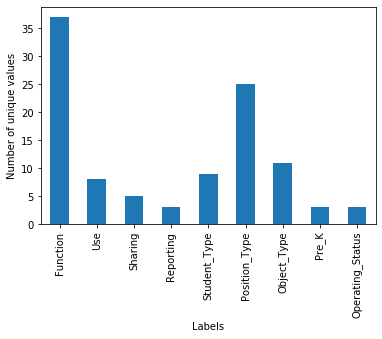

The sum of different labels: 104.000000)


In [8]:
# Time to split the labels from the features, first we make a list containing all the labels:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

# changing the object data types to category
df[LABELS] = df[LABELS].apply(lambda x: x.astype('category'), axis=0)

# Calculate number of unique values for each label: num_unique_labels
unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
unique_labels.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
plt.show()

total_labels = 'The sum of different labels: %f)' % (unique_labels.sum())
print(total_labels)

# Modeling

Next up, setting up the model(s) to predict the 104 labels. The next piece of code will split the dataset using multilabel_train_test_split(): a stratified train_test_split function correcting for values that appear just once. The function is stored in the same directory as this notebook and belongs to DataCamp's custom functions.

In [9]:
# Importing Multilabel functions
import Multilabel

# Get the dummy encoding of the LABELS
dummy_LABELS = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [x for x in df.columns if x not in LABELS]

X_train, X_test, y_train, y_test = Multilabel.multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_LABELS,
                                                               0.2)


In [ ]:
%%time

# Imports pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Import the different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import feature engineering tools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import PolynomialFeatures

# Import preprocessing tools
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler

# import metrics
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

# Creating Function for combining all text strings that aren't numeric predictors or labels
num_data = df.loc[:, ['FTE', 'Total']].fillna(-1000)
num_cols = num_data.columns.to_list()


# function to combine the text columns 
def combine_text (data_frame, to_drop=num_cols + LABELS):
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    text_data.fillna('', inplace=True)
    return text_data.apply(lambda x: " ".join(x), axis=1)

# Setting up FunctionTransformer for preprocessing the text and numerical data seperately
txtdata = FunctionTransformer(combine_text, validate=False)
numdata = FunctionTransformer(lambda x: x[num_cols], validate=False)
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# setting the parameters for the chi squared test
chi_k = 300

# defining variables to be able to execute the 
models = []
models.append(('LR', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('DT', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'

# Pipeline: Preprocessing and Model execution
# evaluate each model in turn
for name, model in models:
    pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', numdata),
                ('imputer', SimpleImputer())
                ])),
            ('text_features', Pipeline([
                    ('selector', txtdata),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    #('dim_red', SelectKBest(chi2, chi_k)): takes way too long and somehow reduced the accuracy substantially
                ]))
             ]
        )),
    #('int', PolynomialFeatures(degree=2)),: takes way too long
    ('scale', MaxAbsScaler()),
    ('clf', OneVsRestClassifier(model))
    ])
    
    # Cross_val_score to be able to easily visualize multiple algorithms accuracy
    kfold = KFold(n_splits=10)
    cvs_results = cross_val_score(pl, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cvs_results)
    names.append(name)
    msg_cvs = "%s: %f (%f)" % (name, cvs_results.mean(), cvs_results.std())
    print(msg_cvs)
    
    # Cross_val_predict to calculate the confusion matrix, especially for the F1 score
    cvp_results = cross_val_predict(pl, X_train, y_train, cv=kfold)
    cm = confusion_matrix(y_train.values.argmax(axis=1), cvp_results.argmax(axis=1))
    ps = precision_score(y_train, cvp_results, average='micro')
    rs = recall_score(y_train, cvp_results, average='micro')
    f1 = f1_score(y_train, cvp_results, average='micro')
    msg_cvp = "%s: %f (%f, %f)" % (name, f1, ps, rs)
    print(msg_cvp)
    
    # Checking our results using the test set
    pl.fit(X_train, y_train)
    test_predictions = pl.predict(X_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(accuracy)
    

## Boxplot of models

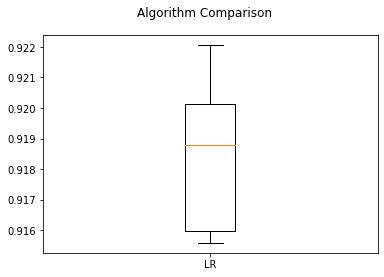

In [11]:
# plotting of future models and comparing the accuracy of all models in a boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Results

Running the Machine takes a very long time so I summarized the outcomes below:

#### Cross_val_score 

LR: 
Accuracy = 0.918397 (0.002229)

#### Confusion matrix calculated scores
LR:
<br>
F1 score = 0.980012 
<br>
Precision score = 0.982153
<br>
Recall score = 0.977880

#### Test set 
Accuracy = 0.9170320404721753

For a multi-class multi-label model the precision, recall and F1 score are more important than the accuracy of the model. The F1 score was 0.98 which is considered very high. It made me wonder whether the algorithm was perhaps overfitting on the data. However, using a cross-validation set should have minimized the chances of that being the case and the accuracy on the test set seemed similar to the accuracy on the train set.

# Discussion

I am very happy to see a working model with an accuracy of around 90% on the test set. Of course, the model can be improved on by including extra steps in the pipeline like polynomial features and parameter tuning. Due to the nature of this model being quite complex (multi-class/multi-label) and having a considerably sized dataset I chose to simplify the model to not make it too time-consuming to execute. I tried using dimensionality reduction to reduce the execution time, however doing so dropped the accuracy of the model by a large amount (40%). If I had the time and/or computational power I would have tried out more models. Even though this was a quick exercise, I am pleasantly surprised that an almost bare Logistic Regression works reasonably well even without additional tools.

I was worried running a cross-validation test in a multi-class multi-label classification machine might cause issues. Similar to why we used multilabel_train_test_split over the regular train_test_split: you want each class to be present in both the train and test data. I assumed the cross validation wouldn't be able to properly handle the sparse labels. It could be that the 'mishandling of multi labeled data' only affected the least common examples in the dataset and therefore does little to influence the performance of the overall machine and goes unnoticed. As such it would be a good idea to also look into the performance of the model on less frequent examples.

# Future changes

- trying out different models and comparing their accuracy scores: Naive Bayes, SVM, KNN, Decision Trees
- GridsearchCV to optimize parameters
- dimensionality reduction again
- including polynomial features again


In [12]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>